#### Objective: Analyze and visualize the global temperature data to better understand climate change and global warming trends.

Questions:

How has the global average temperature changed over time?<br>
How do temperature anomalies vary by latitude and time?<br>
How do temperature trends in the Northern and Southern Hemispheres compare?<br>
Which countries have experienced the highest average temperature increases?<br>
How has the temperature changed across the globe over time?<br>
How effective are the visualizations in answering these questions, and what improvements can be made?

In [103]:
# Importing the libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.offline as py
import warnings
warnings.simplefilter('ignore')

In [2]:
# Loading the datasets
df1 = pd.read_csv('data/GlobalTemperatures.csv') # Global Temperature
df2 = pd.read_csv('data/GlobalLandTemperaturesByCity.csv') # By City 
df3 = pd.read_csv('data/GlobalLandTemperaturesByMajorCity.csv') # By Major City
df4 = pd.read_csv('data/GlobalLandTemperaturesByState.csv') # By State
df5 = pd.read_csv('data/GlobalLandTemperaturesByCountry.csv') # By country

## Data cleaning & Pre-Processing

In [3]:
# First Data frame --> Global Temaperature
df1.head()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty  
0                                        NaN  
1                                        NaN  
2                                        NaN  
3                                        NaN  
4                                        NaN

In [4]:
df1.shape # shape of the data

(3192, 9)

In [5]:
df1.duplicated().sum() # checking for duplicates

0

In [6]:
df1.isnull().sum() # checking for null values

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [7]:
df1.dropna(inplace = True) # dropping the nan values

In [8]:
df1['dt'] = pd.to_datetime(df1['dt']) # chaniging the dt into datetime

In [9]:
df1.dtypes # checking for data types.

dt                                           datetime64[ns]
LandAverageTemperature                              float64
LandAverageTemperatureUncertainty                   float64
LandMaxTemperature                                  float64
LandMaxTemperatureUncertainty                       float64
LandMinTemperature                                  float64
LandMinTemperatureUncertainty                       float64
LandAndOceanAverageTemperature                      float64
LandAndOceanAverageTemperatureUncertainty           float64
dtype: object

In [10]:
# Second DAtaset --> City
df2.head()

dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E

In [11]:
df2.shape # shape

(8599212, 7)

In [12]:
df2.isnull().sum() # checking for null values

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [13]:
df2.duplicated().sum() # checking for the duplicates

0

In [14]:
df2.dropna(inplace = True) # Dropping the nan values

In [15]:
df2['dt'] = pd.to_datetime(df2['dt']) # changing the dt into datetime.

In [16]:
df2.dtypes # checking the data types.

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [17]:
# Third Dataframe --> Major city
df3.head()

dt  AverageTemperature  AverageTemperatureUncertainty     City  \
0  1849-01-01              26.704                          1.435  Abidjan   
1  1849-02-01              27.434                          1.362  Abidjan   
2  1849-03-01              28.101                          1.612  Abidjan   
3  1849-04-01              26.140                          1.387  Abidjan   
4  1849-05-01              25.427                          1.200  Abidjan   

         Country Latitude Longitude  
0  Côte D'Ivoire    5.63N     3.23W  
1  Côte D'Ivoire    5.63N     3.23W  
2  Côte D'Ivoire    5.63N     3.23W  
3  Côte D'Ivoire    5.63N     3.23W  
4  Côte D'Ivoire    5.63N     3.23W

In [18]:
df3.shape # shape of the data

(239177, 7)

In [19]:
df3.duplicated().sum() # checking for duplicates values

0

In [20]:
df3.isnull().sum() # Checking for null values

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [21]:
df3.dropna(inplace = True) # Drop the null values 

In [22]:
df3['dt'] = pd.to_datetime(df3['dt']) # changing dt into the datetime

In [23]:
df3.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [24]:
# Fourth Dataframe --> State
df4.head()

dt  AverageTemperature  AverageTemperatureUncertainty State Country
0  1855-05-01              25.544                          1.171  Acre  Brazil
1  1855-06-01              24.228                          1.103  Acre  Brazil
2  1855-07-01              24.371                          1.044  Acre  Brazil
3  1855-08-01              25.427                          1.073  Acre  Brazil
4  1855-09-01              25.675                          1.014  Acre  Brazil

In [25]:
df4.shape # shape of the data 

(645675, 5)

In [26]:
df4.duplicated().sum() # checking for the duplicate values

0

In [27]:
df4.isnull().sum() # Checking for null values 

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [28]:
df4.dropna(inplace = True) # dropping the values 

In [29]:
df4['dt'] = pd.to_datetime(df4['dt']) # converting dt into the datetime 

In [30]:
df4.dtypes # checking the data types 

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
State                                    object
Country                                  object
dtype: object

In [31]:
# Fifth DAtaframe --> Country 
df5.head()

dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland

In [32]:
df5.shape # shape 

(577462, 4)

In [33]:
df5.duplicated().sum() # checking for duplicate values 

0

In [34]:
df5.isnull().sum() # checking for null values 

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [35]:
df5.dropna(inplace = True) # dropping the null values 

In [36]:
df5['dt'] = pd.to_datetime(df5['dt']) # converting dt into datetime 

In [37]:
df5.dtypes # checking hte data types 

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
Country                                  object
dtype: object

In [38]:
df1.head() # display first 5  rows 

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
1200 1850-01-01                   0.749                              1.105   
1201 1850-02-01                   3.071                              1.275   
1202 1850-03-01                   4.954                              0.955   
1203 1850-04-01                   7.217                              0.665   
1204 1850-05-01                  10.004                              0.617   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
1200               8.242                          1.738              -3.206   
1201               9.970                          3.007              -2.291   
1202              10.347                          2.401              -1.905   
1203              12.934                          1.004               1.018   
1204              15.655                          2.406               3.811   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
1200                          2.822                          12.833   
1201                          1.623                          13.588   
1202                          1.410                          14.043   
1203                          1.329                          14.667   
1204                          1.347                          15.507   

      LandAndOceanAverageTemperatureUncertainty  
1200                                      0.367  
1201                                      0.414  
1202                                      0.341  
1203                                      0.267  
1204                                      0.249

In [39]:
df2.head() # display first  5 rows 

dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0 1743-11-01               6.068                          1.737  Århus   
5 1744-04-01               5.788                          3.624  Århus   
6 1744-05-01              10.644                          1.283  Århus   
7 1744-06-01              14.051                          1.347  Århus   
8 1744-07-01              16.082                          1.396  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
5  Denmark   57.05N    10.33E  
6  Denmark   57.05N    10.33E  
7  Denmark   57.05N    10.33E  
8  Denmark   57.05N    10.33E

In [40]:
df3.head() # display first 5  rows 

dt  AverageTemperature  AverageTemperatureUncertainty     City  \
0 1849-01-01              26.704                          1.435  Abidjan   
1 1849-02-01              27.434                          1.362  Abidjan   
2 1849-03-01              28.101                          1.612  Abidjan   
3 1849-04-01              26.140                          1.387  Abidjan   
4 1849-05-01              25.427                          1.200  Abidjan   

         Country Latitude Longitude  
0  Côte D'Ivoire    5.63N     3.23W  
1  Côte D'Ivoire    5.63N     3.23W  
2  Côte D'Ivoire    5.63N     3.23W  
3  Côte D'Ivoire    5.63N     3.23W  
4  Côte D'Ivoire    5.63N     3.23W

In [41]:
df4.head() # display first  5 rows 

dt  AverageTemperature  AverageTemperatureUncertainty State Country
0 1855-05-01              25.544                          1.171  Acre  Brazil
1 1855-06-01              24.228                          1.103  Acre  Brazil
2 1855-07-01              24.371                          1.044  Acre  Brazil
3 1855-08-01              25.427                          1.073  Acre  Brazil
4 1855-09-01              25.675                          1.014  Acre  Brazil

In [42]:
df5.head() # display first 5 rows 

dt  AverageTemperature  AverageTemperatureUncertainty Country
0 1743-11-01               4.384                          2.294   Åland
5 1744-04-01               1.530                          4.680   Åland
6 1744-05-01               6.702                          1.789   Åland
7 1744-06-01              11.609                          1.577   Åland
8 1744-07-01              15.342                          1.410   Åland

In [43]:
# Our datasets are ready for the analysis.

## EDA

In [44]:
# Let's Explore about the temperature in countries.

In [45]:
# grouping the data by country and calculate the average temperature
avg_tem_cont = df2.groupby('Country')['AverageTemperature'].mean().reset_index()

In [46]:
avg_tem_cont.head(3) # these are the countries having the highest average temperature

Country  AverageTemperature
0  Afghanistan           13.816497
1      Albania           15.525828
2      Algeria           17.763206

In [47]:
# creating a object top_countries, where we are keeping the top 10 countries.
top_countries = avg_tem_cont.sort_values(by='AverageTemperature', ascending=False).head(10)

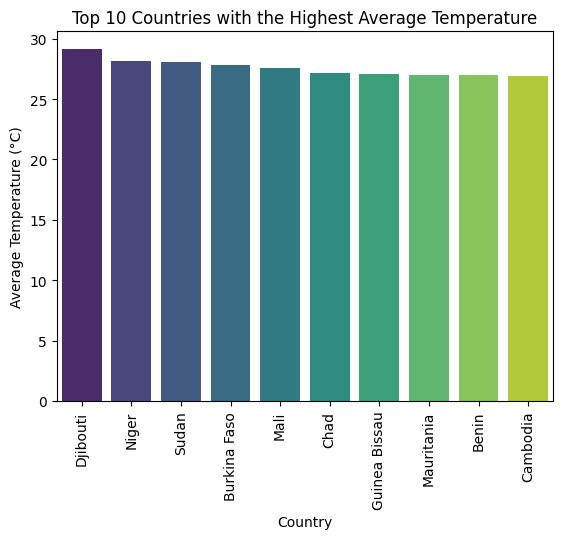

In [48]:
# Creating barplot for the top 10 countries with the highest Average Temperature
sns.barplot(x='Country', y='AverageTemperature', data=top_countries, palette='viridis')
plt.title('Top 10 Countries with the Highest Average Temperature')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Average Temperature (°C)')
plt.show()

+ From the above plot we can see that Djibouti is having the highest average temperature, followed by Niger and sudan

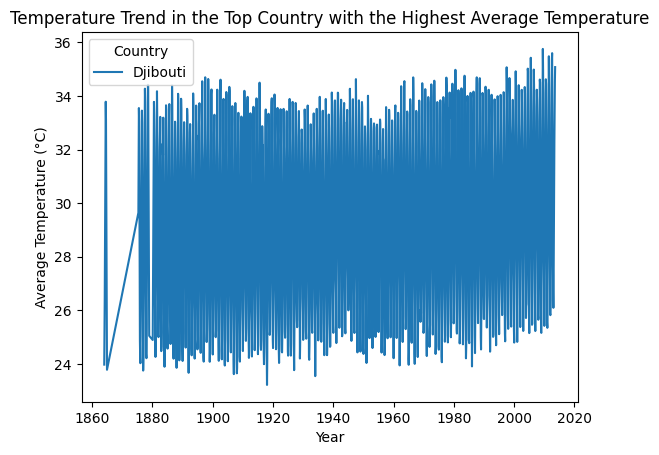

<Figure size 1600x800 with 0 Axes>

In [49]:
# Calculating the average temperature by country and year
df = df2.groupby([df2['Country'], df2['dt'].dt.year])['AverageTemperature'].mean().reset_index()
# getting the top 10 countries with the highest average temperature
top_10_countries = df2.groupby('Country')['AverageTemperature'].mean().nlargest(1).index.tolist()
# Filtering the data to include only the top 10 countries
df_top_10 = df2[df2['Country'].isin(top_10_countries)]
# Plotting the line plot for temperature trend in the top country
sns.lineplot(x='dt', y='AverageTemperature', hue='Country', data=df_top_10)
plt.title('Temperature Trend in the Top Country with the Highest Average Temperature')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.figure(figsize=(16,8))
plt.show()

+ From the above graph, we can see that the average temparature lies between 24 - 34 degree celcious.
+ After year 2000 we can see that there is a slightly increased in temperature by 2-4 degree celcious.

In [50]:
# DF3
# grouping the data by country and calculate the average temperature
avg_tem_cont2 = df3.groupby('Country')['AverageTemperature'].mean().reset_index()

In [51]:
# these are the countries having the highest average temperature
avg_tem_cont2.head(3)

Country  AverageTemperature
0  Afghanistan           14.342919
1       Angola           23.693046
2    Australia           15.190055

In [52]:
# getting top_countries, where we are keeping the top 10 countries.
top_countries = avg_tem_cont2.sort_values(by='AverageTemperature', ascending=False).head(10)

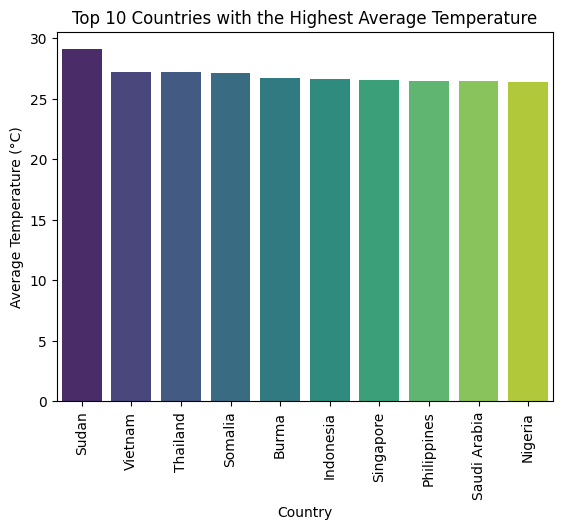

In [53]:
# Creating barplot for the top 10 countries with the highest Average Temperature
sns.barplot(x='Country', y='AverageTemperature', data=top_countries, palette='viridis')
plt.title('Top 10 Countries with the Highest Average Temperature')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Average Temperature (°C)')
plt.show()

+ From the above plot we can see that Sudan is having the highest average temperature, followed by Vietnam and thailand.

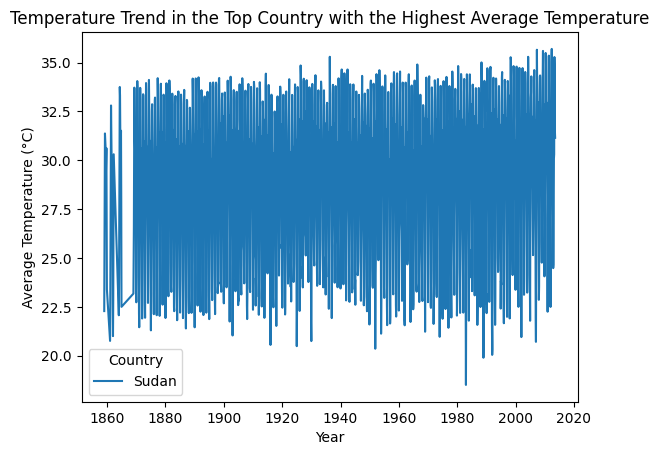

<Figure size 1600x800 with 0 Axes>

In [54]:
# Calculating the average temperature by country and year
df = df3.groupby([df3['Country'], df3['dt'].dt.year])['AverageTemperature'].mean().reset_index()
# Getting the top 10 countries with the highest average temperature
top_10_countries = df3.groupby('Country')['AverageTemperature'].mean().nlargest(1).index.tolist()
# Filtering  the data to include only the top 10 countries
df_top_10 = df3[df3['Country'].isin(top_10_countries)]
# Plotting the line plot for temperature trend in the top country
sns.lineplot(x='dt', y='AverageTemperature', hue='Country', data=df_top_10)
plt.title('Temperature Trend in the Top Country with the Highest Average Temperature')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.figure(figsize=(16,8))
plt.show()

+ From the above graph, we can see that the average temparature lies between 21 - 34 degree celcious.
+ After year 2000 we can see that there is a slightly increased in temperature by 2-3 degree celcious.

In [55]:
#DF4
# grouping the data by country and calculate the average temperature
avg_tem_cont3 = df4.groupby('Country')['AverageTemperature'].mean().reset_index()

In [56]:
# these are the countries having the highest average temperature
avg_tem_cont3.head(3)

Country  AverageTemperature
0  Australia           17.664222
1     Brazil           23.770601
2     Canada           -1.321079

In [57]:
# getting top_countries, where we are keeping the top 10 countries.
top_countries = avg_tem_cont3.sort_values(by='AverageTemperature', ascending=False).head(10)

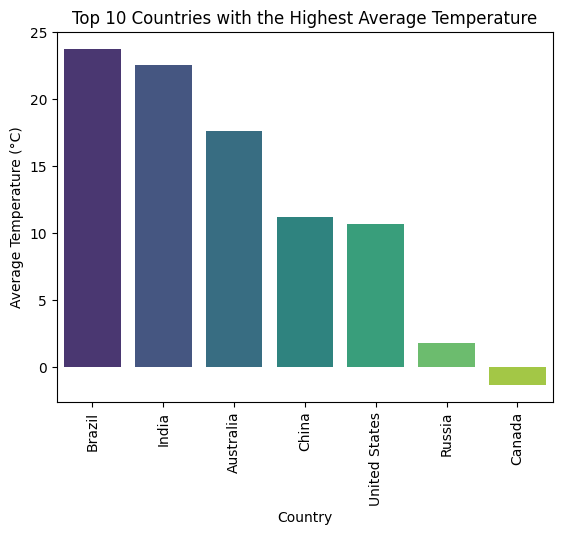

In [58]:
# Creating barplot for the top 10 countries with the highest Average Temperature
sns.barplot(x='Country', y='AverageTemperature', data=top_countries, palette='viridis')
plt.title('Top 10 Countries with the Highest Average Temperature')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Average Temperature (°C)')
plt.show()

+ From the above plot we can see that Brazil is having the highest average temperature, followed by India and Australia.

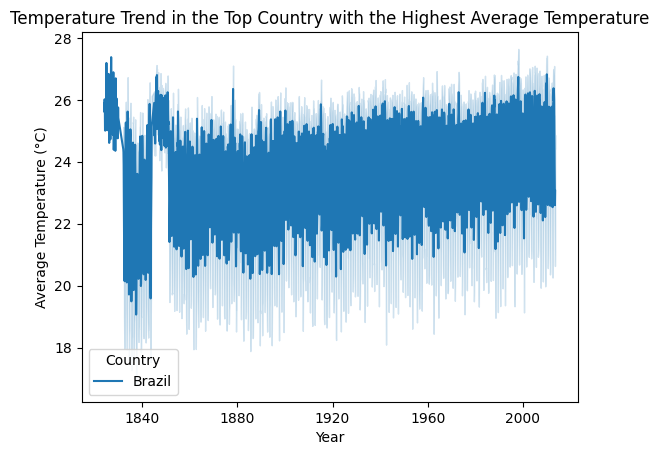

<Figure size 1600x800 with 0 Axes>

In [59]:
# Calculating the average temperature by country and year
df = df4.groupby([df4['Country'], df4['dt'].dt.year])['AverageTemperature'].mean().reset_index()
# Getting the top 10 countries with the highest average temperature
top_10_countries = df4.groupby('Country')['AverageTemperature'].mean().nlargest(1).index.tolist()
# Filtering the data to include only the top 10 countries
df_top_10 = df4[df4['Country'].isin(top_10_countries)]
# Plotting the line plot for temperature trend in the top country
sns.lineplot(x='dt', y='AverageTemperature', hue='Country', data=df_top_10)
plt.title('Temperature Trend in the Top Country with the Highest Average Temperature')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.figure(figsize=(16,8))
plt.show()

+ This is very interesting, there is high flacuvation between the year 1800 - 1850.
+ The average temperature is between 18 - 28 degree celcious

In [60]:
# DF5
# grouping the data by country and calculate the average temperature
avg_tem_cont4 = df5.groupby('Country')['AverageTemperature'].mean().reset_index()

In [61]:
avg_tem_cont4.head(3) # these are the countries having the highest average temperature

Country  AverageTemperature
0  Afghanistan           14.045007
1       Africa           24.074203
2      Albania           12.610646

In [62]:
# getting top_countries, where we are keeping the top 10 countries.
top_countries = avg_tem_cont4.sort_values(by='AverageTemperature', ascending=False).head(10)

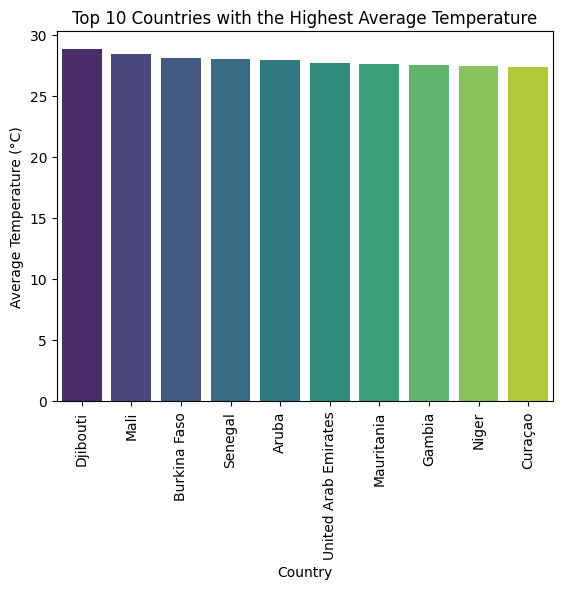

In [63]:
# Creating barplot for the top 10 countries with the highest Average Temperature
sns.barplot(x='Country', y='AverageTemperature', data=top_countries, palette='viridis')
plt.title('Top 10 Countries with the Highest Average Temperature')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Average Temperature (°C)')
plt.show()

+ From the above plot we can see that Djibouti is having the highest average temperature, followed by Mali and Burkina Faso.

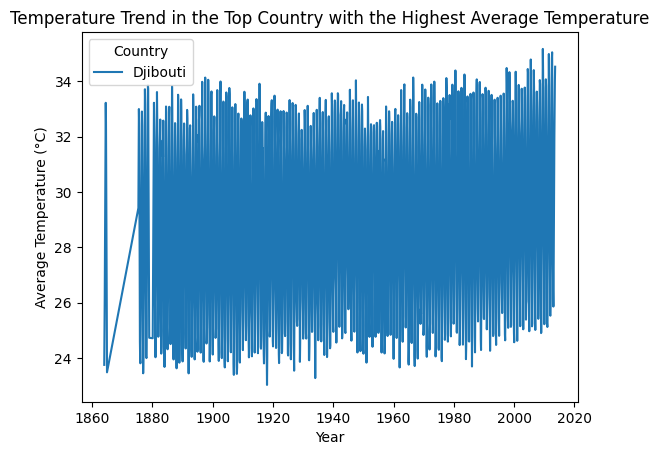

<Figure size 1600x800 with 0 Axes>

In [64]:
# Calculating the average temperature by country and year
df = df5.groupby([df5['Country'], df5['dt'].dt.year])['AverageTemperature'].mean().reset_index()
# Getting the top 10 countries with the highest average temperature
top_10_countries = df5.groupby('Country')['AverageTemperature'].mean().nlargest(1).index.tolist()
# Filtering the data to include only the top 10 countries
df_top_10 = df5[df5['Country'].isin(top_10_countries)]
# Plotting the line plot for temperature trend in the top country
sns.lineplot(x='dt', y='AverageTemperature', hue='Country', data=df_top_10)
plt.title('Temperature Trend in the Top Country with the Highest Average Temperature')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.figure(figsize=(16,8))
plt.show()

+ This is very interesting, there is data missing in the year between 1860 - 1880
+ The average temperature is between 24 - 34 degree celcious
+ After year 2000 we can see that there is a slightly increased in temperature by 2-3 degree celcious.

### How has the global average temperature changed over time?

####  DataFrame (df1) -- (Global Temperature)

In [65]:
# Calculating the mean global temperature for each year using LandAndOceanAverageTemperature column
global_temp = df1.groupby(df1['dt'].dt.year)['LandAndOceanAverageTemperature'].mean().reset_index()

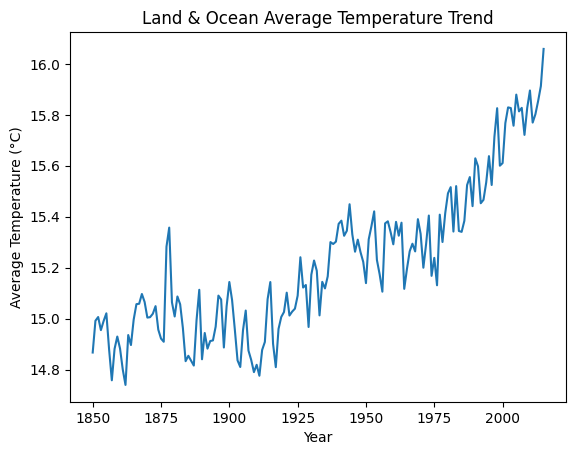

In [66]:
# plotting the linegraph between the Land And Ocean Average temaperature and Year.
plt.plot(global_temp['dt'], global_temp['LandAndOceanAverageTemperature'])
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Land & Ocean Average Temperature Trend')
plt.show()

+ From  The above Line graph, we can see that there is trend of average temerature over time
+ AS the years increasing, the temperatures are also increasing
+ we can see some of the flacuvations in the trend, but we can see a huge difference in the year 1875, where the average temperature raised 20-30 %
+ from the year 1975, there is trend with low flacuvations and we can also see that there is a huge bumb after the year 2000.
+ from this graph we can say that there is significant chagne in the temperature over a period of time.

In [67]:
# Calculating the mean global temperature for each year using LandAverageTemperature column
global_temp1 = df1.groupby(df1['dt'].dt.year)['LandAverageTemperature'].mean().reset_index()

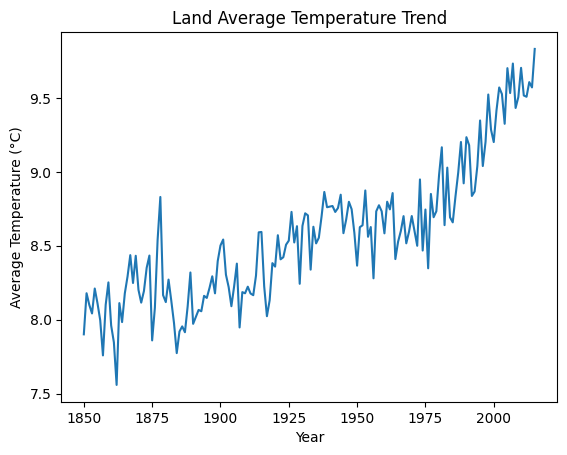

In [68]:
# plotting the linegraph between the Land Average temaperature and Year.
plt.plot(global_temp1['dt'], global_temp1['LandAverageTemperature'])
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Land Average Temperature Trend')
plt.show()

+ From  The above Line graph, we can see that there is trend of average temerature over time
+ AS the years increasing, the temperatures are also increasing
+ we can see some of the flacuvations in the trend, but we can see a huge difference in the year 1875, where the average temperature raised 20-30 %
+ from the year 1975, there is trend with low flacuvations and we can also see that there is a huge bumb after the year 2000.
+ from this graph we can say that there is significant chagne in the temperature over a period of time.

## How do temperature anomalies vary by latitude and time?

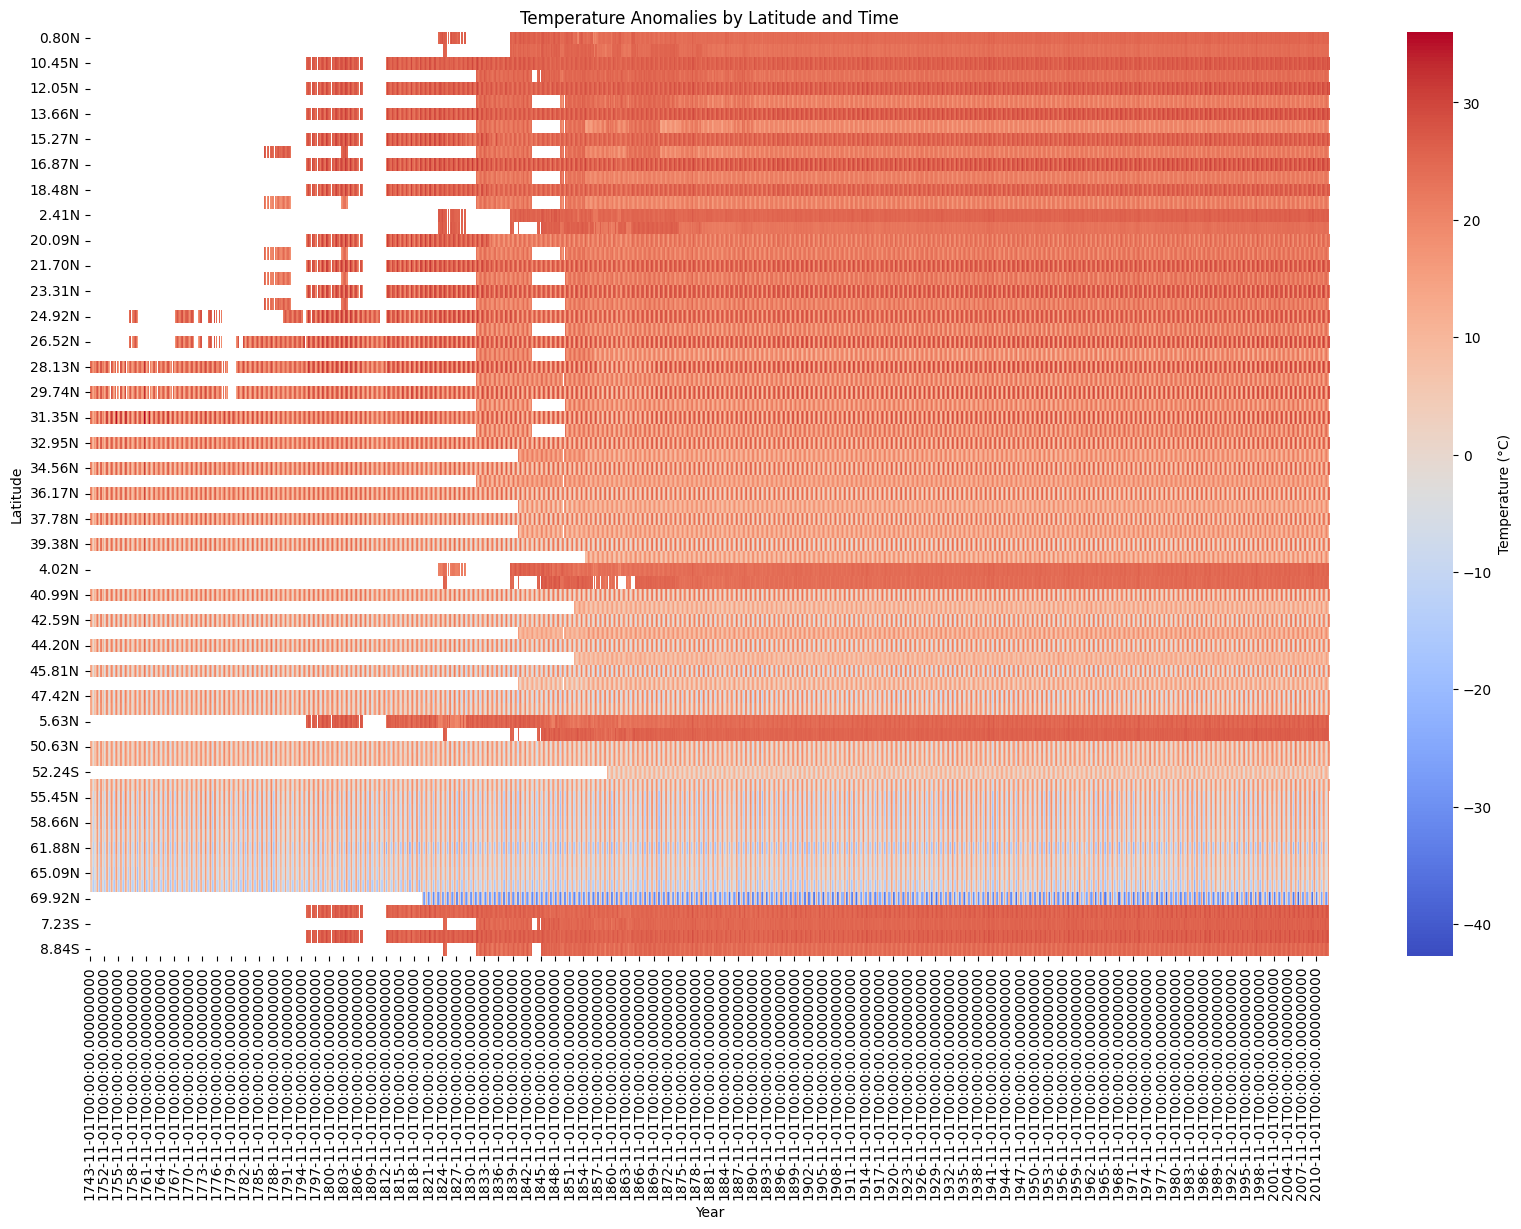

In [69]:
# Creating a pivot table with Latitude and dt as indices and AverageTemperature as values
pivot = df2.pivot_table(index=['Latitude', 'dt'], values='AverageTemperature')

# Reshaping the pivot table to a 2D array with dt as columns and Latitude as rows
heatmap_data = pivot.reset_index().pivot(index='Latitude', columns='dt', values='AverageTemperature')

# Creating the heatmap using seaborn's heatmap function
plt.figure(figsize=(20,12))
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Temperature (°C)'})
plt.title('Temperature Anomalies by Latitude and Time')
plt.xlabel('Year')
plt.ylabel('Latitude')
plt.show()

+ From the above Heatmap we can see that there are some anomalies that are divided by the latitude and the time.
+ The blue color indicates the cooler temperatures and the red color indicates the high temperature.
+ there are some anomalies at the higher latitudes, especially in the northern hemisphere.

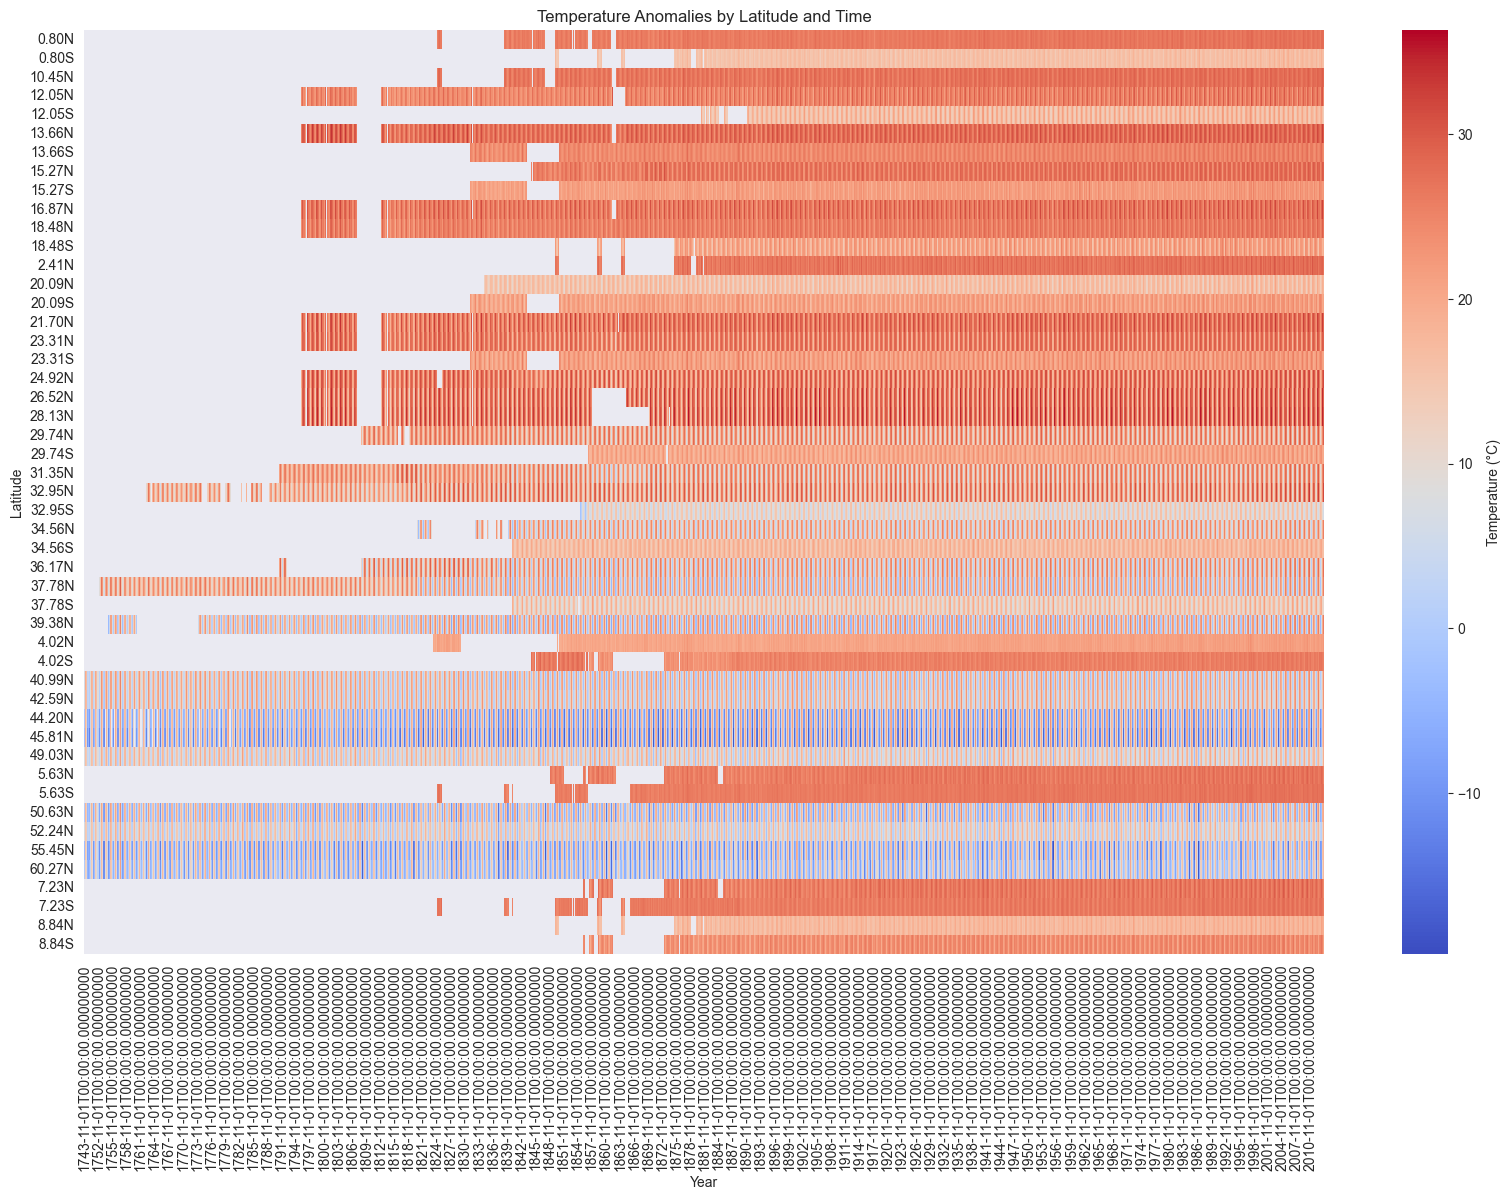

In [113]:
# Create a pivot table with Latitude and dt as indices and AverageTemperature as values
pivot = df3.pivot_table(index=['Latitude', 'dt'], values='AverageTemperature')

# Reshape the pivot table to a 2D array with dt as columns and Latitude as rows
heatmap_data = pivot.reset_index().pivot(index='Latitude', columns='dt', values='AverageTemperature')

# Create the heatmap using seaborn's heatmap function
plt.figure(figsize=(20,12))
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Temperature (°C)'})
plt.title('Temperature Anomalies by Latitude and Time')
plt.xlabel('Year')
plt.ylabel('Latitude')
plt.show()

+ From the above Heatmap we can see that there are some anomalies that are divided by the latitude and the time.
+ The blue color indicates the cooler temperatures and the red color indicates the high temperature.
+ there are lot of anamolies when compared with the dataset-3.

## How do temperature trends in the Northern and Southern Hemispheres compare?

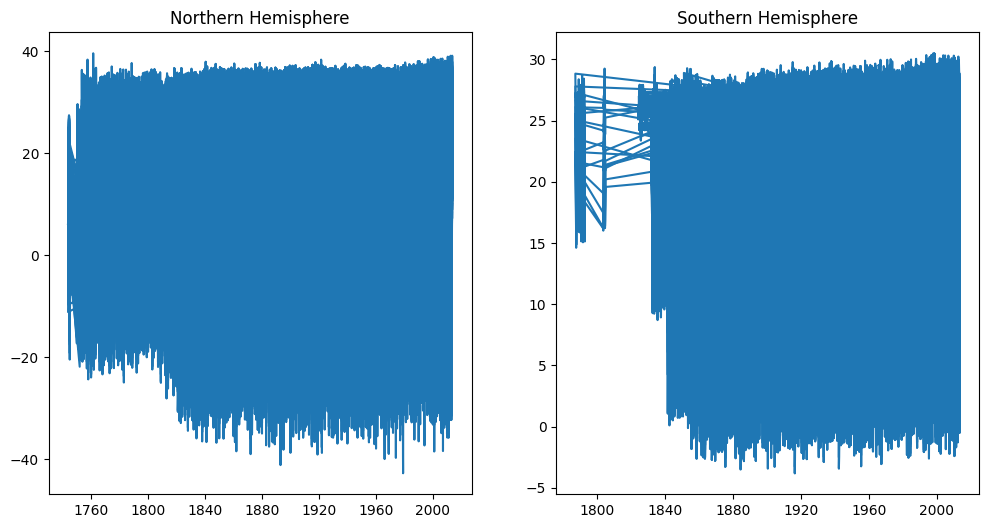

In [73]:
# Adding a new column to indicate the hemisphere of each data point
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

df2['Hemisphere'] = df2['Latitude'].apply(lambda x: 'Northern' if x[-1] == 'N' else 'Southern')

# Splitting the dataframe into two separate dataframes based on the hemisphere
df_north = df2[df2['Hemisphere'] == 'Northern']
df_south = df2[df2['Hemisphere'] == 'Southern']

# Plotting the temperature trends for each hemisphere side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

ax1.plot(df_north['dt'], df_north['AverageTemperature'])
ax1.set_title('Northern Hemisphere')

ax2.plot(df_south['dt'], df_south['AverageTemperature'])
ax2.set_title('Southern Hemisphere')

plt.show()

+ We can see that when we compare the north hemishere with the south hemisphere, the average temparatures in the northern hemisphere is in between -20 - 35 and in the southrern hemisphere -5 - 30.
+ there are lot flacuvations in the southern hemisphere in terms of temperature, but in the notheren hemisphere, the temperature are lies between a range.
+ from analysing both these two graphs, we can say that the northen hemisphere has experienced the coldest and hottest temperatures when compared to the southern hemisphere.

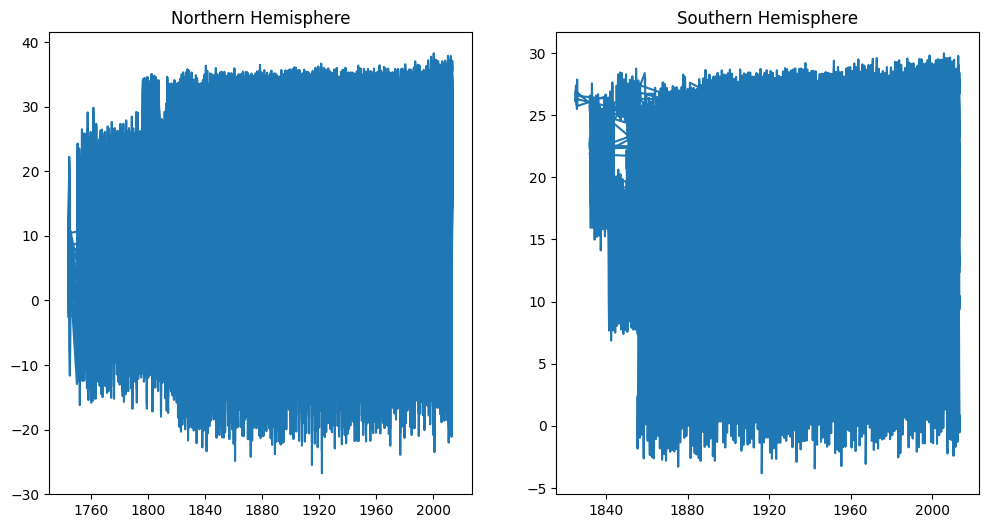

In [74]:
# Adding a new column to indicate the hemisphere of each data point
df3['Hemisphere'] = df3['Latitude'].apply(lambda x: 'Northern' if x[-1] == 'N' else 'Southern')

# Splitting the dataframe into two separate dataframes based on the hemisphere
df_north = df3[df3['Hemisphere'] == 'Northern']
df_south = df3[df3['Hemisphere'] == 'Southern']

# Plotting the temperature trends for each hemisphere side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

ax1.plot(df_north['dt'], df_north['AverageTemperature'])
ax1.set_title('Northern Hemisphere')

ax2.plot(df_south['dt'], df_south['AverageTemperature'])
ax2.set_title('Southern Hemisphere')

plt.show()

+ We can see that when we compare the north hemishere with the south hemisphere, the average temparatures in the northern hemisphere is in between -20 - 35 and in the southrern hemisphere -3 - 28.
+ In the southern hemisphere, we can see that the min temerature has increased dramasticly after the year 1840.
+ there are lot flacuvations in the southern hemisphere in terms of temperature, but in the notheren hemisphere, the temperature are lies between a range.
+ from analysing both these two graphs, we can say that the northen hemisphere has experienced the coldest and hottest temperatures when compared to the southern hemisphere.

## Which countries have experienced the highest average temperature increases?

In [75]:
# Calculating average temperature change per country
df2['Year'] = df2['dt'].dt.year
df2['Temp_Increase'] = df2.groupby('Country')['AverageTemperature'].transform(lambda x: x.iat[-1] - x.iat[0])
df_country = df2.groupby('Country')['Temp_Increase'].mean().reset_index()

# Sorting the dataframe by temperature increase in descending order and select the top 10 countries
top_countries = df_country.sort_values(by='Temp_Increase', ascending=False).head(10)
top_countries

Country  Temp_Increase
153    Uzbekistan         33.201
130   South Korea         31.361
140    Tajikistan         29.405
2         Algeria         29.344
146  Turkmenistan         28.103
53        Georgia         25.774
5         Armenia         25.774
0     Afghanistan         25.330
69           Iraq         25.233
74          Japan         23.987

In [76]:
# These are the top 10 countries having the highest temperature increases

In [77]:
# Creating a bar plot of the average temperature increase for each country
import plotly.graph_objs as go

data = [go.Bar(
            x=top_countries['Country'],
            y=top_countries['Temp_Increase'],
            marker=dict(
                color=top_countries['Temp_Increase'],
                colorscale='Viridis'
            ),
            text=top_countries['Temp_Increase'],
            textposition='auto',
        )]

layout = go.Layout(
    title='Top 10 Countries with the Highest Average Temperature Increases',
    xaxis=dict(
        title='Country',
    ),
    yaxis=dict(
        title='Average Temperature Increase (°C)',
    ),
    hovermode='closest'
)

fig = go.Figure(data=data, layout=layout)
fig.show()

+ From the above Graph we can see that the Uzebekistan and the south korea are having the highest temperature change, followed by the Tajikistan and Algenia.

In [85]:
# creating a choropleth map to see the top countries with high average temaperatuture increase
data = [ dict(
        type = 'choropleth',
        locations = top_countries['Country'],
        z = top_countries['Temp_Increase'],
        locationmode = 'country names',
        text = top_countries['Country'],
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Temperature,\n°C')
            )
       ]

layout = dict(
    title = 'Top 10 Countries with the Highest Average Temperature Increases',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

In [86]:
# Calculating average temperature change per country
df3['Year'] = df3['dt'].dt.year
df3['Temp_Increase'] = df3.groupby('Country')['AverageTemperature'].transform(lambda x: x.iat[-1] - x.iat[0])
df_country = df3.groupby('Country')['Temp_Increase'].mean().reset_index()

# Sorting the dataframe by temperature increase in descending order and select the top 10 countries
top_countries = df_country.sort_values(by='Temp_Increase', ascending=False).head(10)
top_countries

Country  Temp_Increase
36  South Korea         31.361
43       Turkey         31.087
20         Iraq         27.501
19         Iran         25.299
0   Afghanistan         22.684
30       Russia         19.723
25      Morocco         19.659
44      Ukraine         19.049
6        Canada         16.453
37        Spain         15.947

In [87]:
# Creating a bar plot of the average temperature increase for each country
data = [go.Bar(
            x=top_countries['Country'],
            y=top_countries['Temp_Increase'],
            marker=dict(
                color=top_countries['Temp_Increase'],
                colorscale='Viridis'
            ),
            text=top_countries['Temp_Increase'],
            textposition='auto',
        )]

layout = go.Layout(
    title='Top 10 Countries with the Highest Average Temperature Increases',
    xaxis=dict(
        title='Country',
    ),
    yaxis=dict(
        title='Average Temperature Increase (°C)',
    ),
    hovermode='closest'
)

fig = go.Figure(data=data, layout=layout)
fig.show()

+ From the above Graph we can see that the south korea and Turkey are having the highest temperature change, followed by the Iraq and Iran.

In [89]:
data = [ dict(
        type = 'choropleth',
        locations = top_countries['Country'],
        z = top_countries['Temp_Increase'],
        locationmode = 'country names',
        text = top_countries['Country'],
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Temperature,\n°C')
            )
       ]

layout = dict(
    title = 'Top 10 Countries with the Highest Average Temperature Increases',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
            type = 'orthographic',
            rotation = dict(
                lon = 60,
                lat = 10
            ),
            ),
        ),
    )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

In [90]:
# Calculating average temperature change per country
df4['Year'] = df4['dt'].dt.year
df4['Temp_Increase'] = df4.groupby('Country')['AverageTemperature'].transform(lambda x: x.iat[-1] - x.iat[0])
df_country = df2.groupby('Country')['Temp_Increase'].mean().reset_index()

# Sorting the dataframe by temperature increase in descending order and select the top 10 countries
top_countries = df_country.sort_values(by='Temp_Increase', ascending=False).head(10)
top_countries

Country  Temp_Increase
153    Uzbekistan         33.201
130   South Korea         31.361
140    Tajikistan         29.405
2         Algeria         29.344
146  Turkmenistan         28.103
53        Georgia         25.774
5         Armenia         25.774
0     Afghanistan         25.330
69           Iraq         25.233
74          Japan         23.987

In [91]:
# Creating a bar plot of the average temperature increase for each country
data = [go.Bar(
            x=top_countries['Country'],
            y=top_countries['Temp_Increase'],
            marker=dict(
                color=top_countries['Temp_Increase'],
                colorscale='Viridis'
            ),
            text=top_countries['Temp_Increase'],
            textposition='auto',
        )]

layout = go.Layout(
    title='Top 10 Countries with the Highest Average Temperature Increases',
    xaxis=dict(
        title='Country',
    ),
    yaxis=dict(
        title='Average Temperature Increase (°C)',
    ),
    hovermode='closest'
)

fig = go.Figure(data=data, layout=layout)
fig.show()

+ From the above Graph we can see that the Uzebekistan and the south korea are having the highest temperature change, followed by the Tajikistan and Algenia.

In [92]:
data = [ dict(
        type = 'choropleth',
        locations = top_countries['Country'],
        z = top_countries['Temp_Increase'],
        locationmode = 'country names',
        text = top_countries['Country'],
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Temperature,\n°C')
            )
       ]

layout = dict(
    title = 'Top 10 Countries with the Highest Average Temperature Increases',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
            type = 'orthographic',
            rotation = dict(
                lon = 60,
                lat = 10
            ),
            ),
        ),
    )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

In [98]:
# Calculating average temperature change per country
df5['Year'] = df5['dt'].dt.year
df5['Temp_Increase'] = df5.groupby('Country')['AverageTemperature'].transform(lambda x: x.iat[-1] - x.iat[0])
df_country = df5.groupby('Country')['Temp_Increase'].mean().reset_index()

# Sorting the dataframe by temperature increase in descending order and select the top 10 countries
top_countries = df_country.sort_values(by='Temp_Increase', ascending=False).head(10)
top_countries

Country  Temp_Increase
179        Russia         40.933
114    Kazakhstan         35.809
159   North Korea         34.033
233    Uzbekistan         31.330
204   South Korea         31.278
119    Kyrgyzstan         30.084
224  Turkmenistan         29.727
105          Iraq         27.584
111         Japan         26.769
215    Tajikistan         26.333

In [99]:
# Creating a bar plot of the average temperature increase for each country
data = [go.Bar(
            x=top_countries['Country'],
            y=top_countries['Temp_Increase'],
            marker=dict(
                color=top_countries['Temp_Increase'],
                colorscale='Viridis'
            ),
            text=top_countries['Temp_Increase'],
            textposition='auto',
        )]

layout = go.Layout(
    title='Top 10 Countries with the Highest Average Temperature Increases',
    xaxis=dict(
        title='Country',
    ),
    yaxis=dict(
        title='Average Temperature Increase (°C)',
    ),
    hovermode='closest'
)

fig = go.Figure(data=data, layout=layout)
fig.show()

+ From the above Graph we can see that the Russia and the Kazakhistan  are having the highest temperature change, followed by the North Korea and Uzbekistan.

In [100]:
data = [ dict(
        type = 'choropleth',
        locations = top_countries['Country'],
        z = top_countries['Temp_Increase'],
        locationmode = 'country names',
        text = top_countries['Country'],
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Temperature,\n°C')
            )
       ]

layout = dict(
    title = 'Top 10 Countries with the Highest Average Temperature Increases',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
            type = 'orthographic',
            rotation = dict(
                lon = 60,
                lat = 10
            ),
            ),
        ),
    )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

## How has the temperature changed across the globe over time?

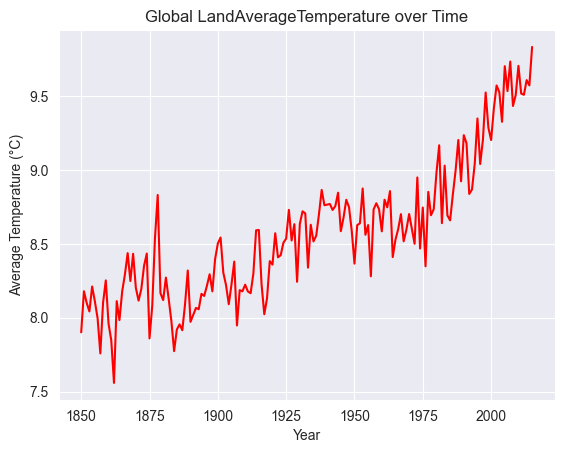

In [101]:
# Calculating global average temperature per year
df1['Year'] = df1['dt'].dt.year
global_temp = df1.groupby('Year')['LandAverageTemperature'].mean().reset_index()

# Creating line plot of global temperature over time
sns.set_style('darkgrid')
sns.lineplot(x='Year', y='LandAverageTemperature', data=global_temp, color='red')
plt.title('Global LandAverageTemperature over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.show()

+ From  The above Line graph, we can see that there is trend of average temerature over time
+ AS the years increasing, the temperatures are also increasing
+ we can see some of the flacuvations in the trend, but we can see a huge difference in the year 1875, where the average temperature raised 20-30 %
+ from the year 1975, there is trend with low flacuvations and we can also see that there is a huge bumb after the year 2000.
+ from this graph we can say that there is significant change in the temperature over a period of time.

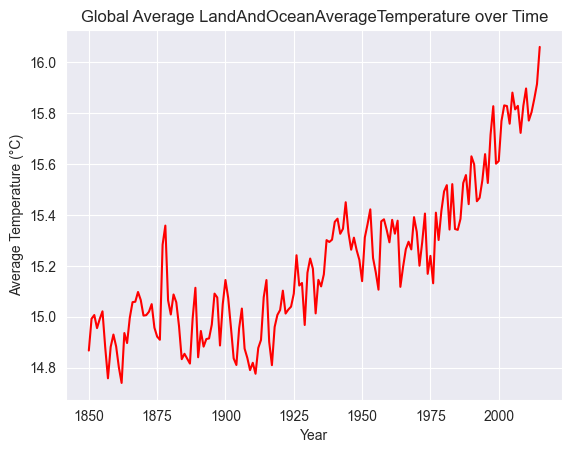

In [102]:
# Calculating global average temperature per year
df1['Year'] = df1['dt'].dt.year
global_temp = df1.groupby('Year')['LandAndOceanAverageTemperature'].mean().reset_index()

# Creating line plot of global temperature over time
sns.set_style('darkgrid')
sns.lineplot(x='Year', y='LandAndOceanAverageTemperature', data=global_temp, color='red')
plt.title('Global Average LandAndOceanAverageTemperature over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.show()

+ From  The above Line graph, we can see that there is trend of average temerature over time
+ AS the years increasing, the temperatures are also increasing
+ we can see some of the flacuvations in the trend, but we can see a huge difference in the year 1875, where the average temperature raised 20-30 %
+ from the year 1975, there is trend with low flacuvations and we can also see that there is a huge bumb after the year 2000.
+ from this graph we can say that there is significant change in the temperature over a period of time.

## How effective are the visualizations in answering these questions, and what improvements can be made?

visualizations are very important because they help us to understand the data easily regarding what background you are.<br>

**One picture is worth of thousand words**<br>

With the helpp of the visualizations we understood the data in a fast way, It is really hard for a non-technical person to understand the numbers and correaltion etc, the visualizations like scatterplots, barplots, heatmaps, linemaps etc, are very helpful interms of understanding the data in a better way.

Regarding with these questions.


+ Lineplots are very useful and show trends over time or to compare multiple variables on the same scale.
+ barplots are used to understand the distribution in a better way, we have used for sales and profits.
+ Heatmaps to used to see the realations between the features


Improvements interms of data.

+ we can add some more features, which may important for the analysis.
+ we can remove some of the features, that are not useful for the analysis.